## Create Siemens Star 
C/O Chatgpt and https://www.mathworks.com/matlabcentral/answers/246573-how-to-design-siemens-star-pattern-like-on-the-image

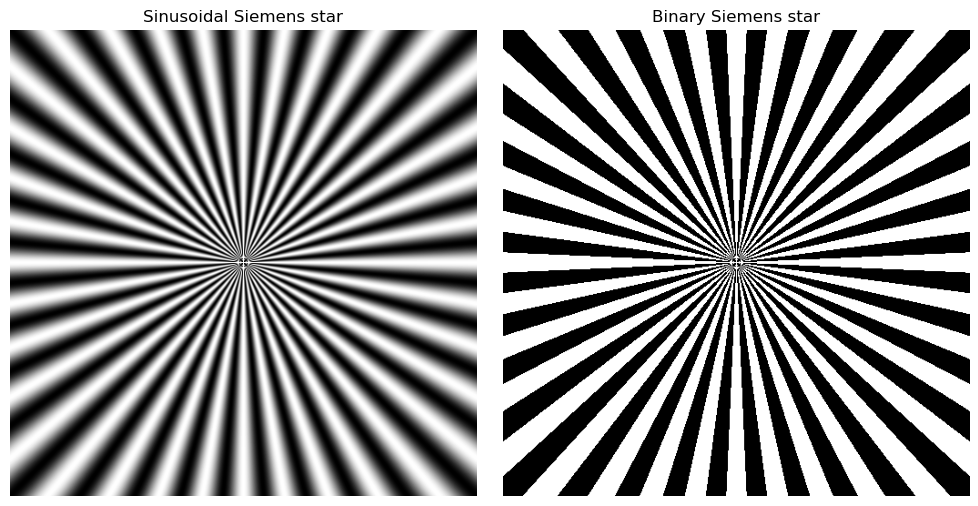

In [2]:
import numpy as np
import matplotlib.pyplot as plt

r = 256                                     # px, radius of star
cycles = 36                                 # number of spokes
X, Y = np.meshgrid(np.arange(-r, r+1), np.arange(-r, r+1))
phy = np.arctan2(Y, X) * cycles             # phase at each pixel
intensity = np.cos(phy)                     # relative intensity
sinStar = np.uint8(intensity * 127.5 + 127.5)# sinusoidal Siemens star
binStar = np.zeros((r*2+1, r*2+1), dtype=np.uint8)
binStar[intensity >= 0] = 255               # binary Siemens star

# Displaying the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(sinStar, cmap='gray')
plt.title('Sinusoidal Siemens star')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binStar, cmap='gray')
plt.title('Binary Siemens star')
plt.axis('off')

plt.tight_layout()
plt.show()


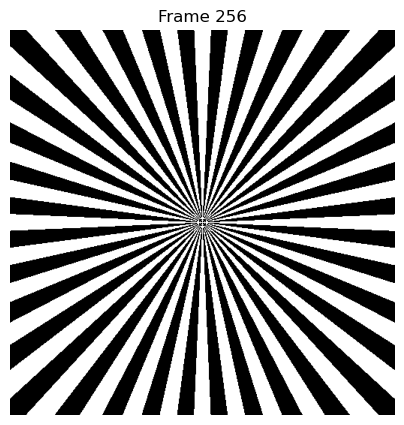

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
r = 256                                     # px, radius of star
cycles = 36                                 # number of spokes
frames = 256                                # number of animation frames
fps = 30                                    # frames per second
output_file = './siemens_star/siemens_star_rotation.avi'   # output file name (AVI format)

# Initialize meshgrid
X, Y = np.meshgrid(np.arange(-r, r+1), np.arange(-r, r+1))

# Create figure and axes
fig, ax = plt.subplots(figsize=(5, 5))

# Function to update each frame
def update(frame):
    # Calculate phase with time-dependent shift
    phy = np.arctan2(Y, X) * cycles + 2 * np.pi * frame / frames
    intensity = np.cos(phy)                     # relative intensity
    binStar = np.zeros((r*2+1, r*2+1), dtype=np.uint8)
    binStar[intensity >= 0] = 255               # binary Siemens star
    
    # Update plot
    ax.clear()
    ax.imshow(binStar, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Frame {frame + 1}')
    
# Create animation
ani = animation.FuncAnimation(fig, update, frames=frames, interval=1000/fps)

# Set up writer explicitly for lossless AVI (rawvideo codec)
Writer = animation.FFMpegWriter(fps=fps, metadata=dict(artist='Me'), codec='rawvideo')

# Save animation as lossless AVI
ani.save(output_file, writer=Writer)

plt.show()
